# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.69954068 2.58227617 2.17158942 2.47474584 2.9649231  2.97400964
 2.86367064 2.66951568 2.63468453 2.36073972]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [191]:
# your code here
from scipy.stats import normaltest

def random_distributed (bottom,ceiling,count):
    x = uniform.rvs(size=count)
    randoms = bottom + (ceiling-bottom)*x
    return randoms

first_set=pd.DataFrame(random_distributed(10, 15, 100),columns=['values'])
second_set=pd.DataFrame(random_distributed(10, 60, 1000),columns=['values'])



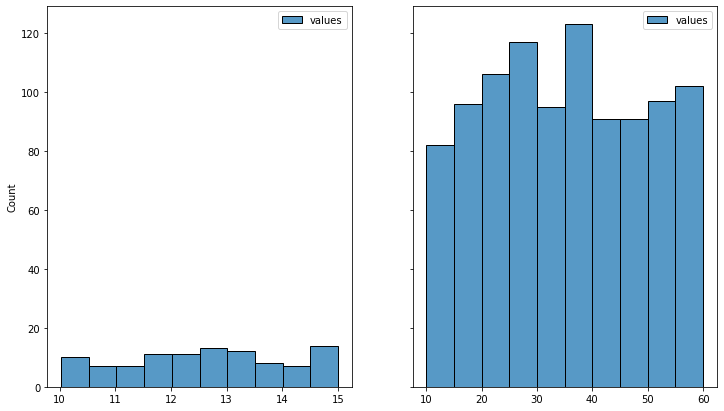

In [193]:
f, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

sns.histplot(first_set,ax=axes[0],bins=10)
sns.histplot(second_set,ax=axes[1],bins=10)


How are the two distributions different?

In [139]:
# your answer here:
#The domain and the range of both distributions differ 

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [171]:
# your code here
from scipy.stats import norm 
from scipy.stats import kstest
from scipy import stats

In [42]:
# loc = mean
# scale = stdev
# size = # of data points
#gaussian = np.random.normal(loc=0, scale=1, size=1000)
#gaussian = norm.rvs(loc=0, scale=1, size=1000)

def nordis (loc,scale,size):
    return norm.rvs(loc=loc, scale=scale, size=size)

norm_1 = nordis(10,1,1000)
norm_2 = nordis(10,50,1000)

How are the two distributions different?

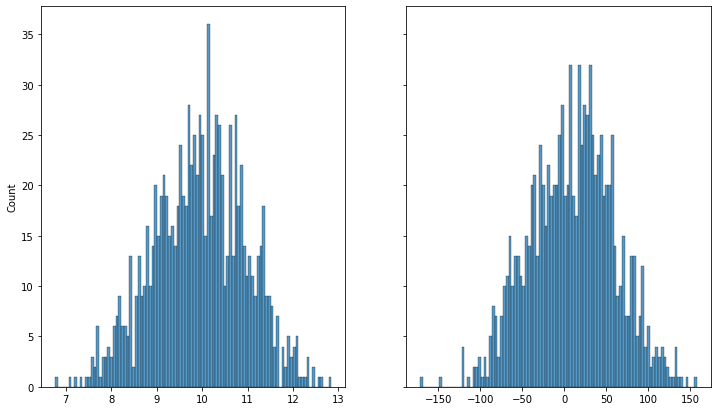

In [142]:
# your answer here:
f, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

sns.histplot(norm_1,ax=axes[0],bins=100)
sns.histplot(norm_2,ax=axes[1],bins=100)

# range and domain are different the rest is similiar 

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [143]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


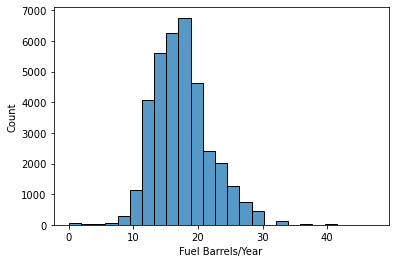

In [65]:
# your code here

sns.histplot(vehicles['Fuel Barrels/Year'],bins=25)

2. CO2 Emission Grams/Mile 

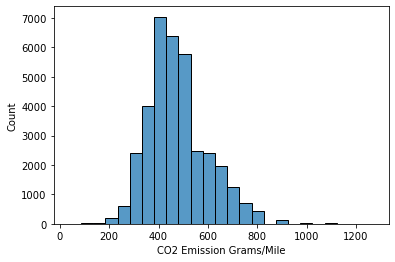

In [64]:
# your code here
sns.histplot(vehicles['CO2 Emission Grams/Mile'],bins=25)

3. Combined MPG

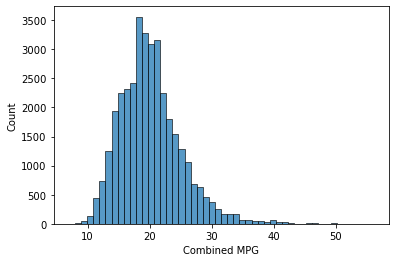

In [61]:
# your code here
sns.histplot(vehicles['Combined MPG'],bins=50)

Which one(s) of the variables are nearly normally distributed? How do you know?

In [152]:
# you answer here:
k2, p = stats.normaltest(vehicles['Combined MPG'])
k2, p = stats.normaltest(vehicles['Fuel Barrels/Year'])
k2, p = stats.normaltest(vehicles['CO2 Emission Grams/Mile'])

#all three are normal distributions

0.0

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

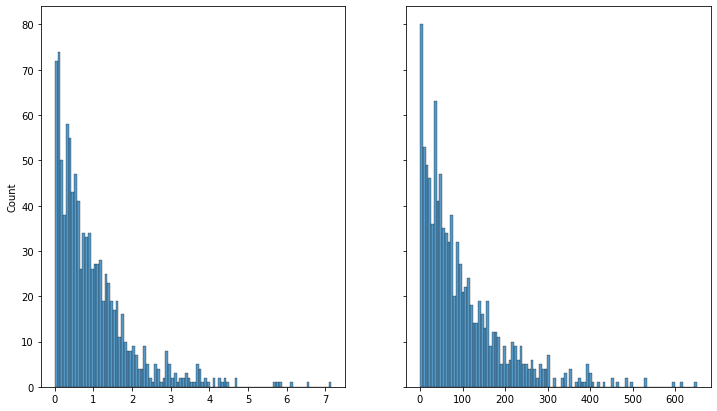

In [75]:
# your code here
def exp_ran(scale,size):
    return np.random.exponential(scale=scale,size=size)

ran1=exp_ran(1,1000)
ran2=exp_ran(100,1000)

f, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

sns.histplot(ran1,ax=axes[0],bins=100)
sns.histplot(ran2,ax=axes[1],bins=100)

How are the two distributions different?

In [ ]:
# your answer here:


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

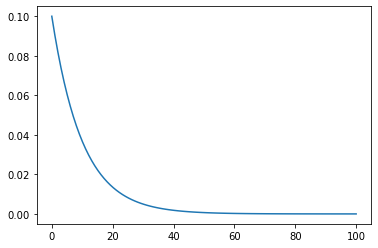

In [132]:
# your answer here
# Hint: This is same as saying P(x<15)

from scipy.stats import expon
exp = expon(scale= 10)
x = np.linspace(0,100,100)
y = expon.pdf(x,scale=10)
fig, ax = plt.subplots(1, 1)
ax.plot(x,y)

#f, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=True)
#ran3 = exp_ran(10,1000)
#sns.histplot(ran3,ax=axes[0],bins=100)

In [129]:
waiting = 15

# Random Variates 
R = expon.rvs(loc=10,scale = 10, size = 100) 
print ("Random Variates : \n", R) 

# PDF 
R = expon.cdf(waiting, loc = 10, scale = 10) 
print ("\nProbability Distribution : \n", R)


Random Variates : 
 [11.89740457 24.49664034 12.00969613 17.06034491 18.88929524 14.87666617
 25.72563531 23.24755923 18.70653822 11.94552591 18.8949773  24.24112431
 13.02047952 43.65795054 18.13606322 12.56270674 14.88450749 18.08565079
 19.5562342  45.56063753 20.42435016 10.39618612 63.31578784 15.69137078
 13.60062589 30.9533831  14.76753136 17.51739404 12.21961317 31.2001758
 13.68220965 13.6706718  10.74769038 11.76530345 24.44929109 15.04721441
 23.97344895 15.49119455 14.84147714 21.54808934 12.29707272 14.87770405
 23.38558188 27.39633987 14.15212565 15.32443953 12.23369593 11.71483356
 20.38638223 56.28037974 13.37366684 21.01196593 10.67605991 11.66504418
 22.84239192 30.44080696 23.72614422 38.32615396 26.18943782 12.43547504
 24.51840341 23.92911062 14.56841692 17.51746802 12.12315581 13.92955245
 10.76664521 43.08317111 32.3386229  14.16464602 13.25043753 12.80448739
 21.50641155 10.61070672 26.76075579 13.58103205 18.94931983 65.42148793
 17.51224388 16.40901347 12.2205

What is the probability that the customer will spend more than 15 minutes

In [138]:
for i in range (15):
    print(i)
    print(exp.cdf(i))

0
0.0
1
0.09516258196404044
2
0.18126924692201815
3
0.2591817793182821
4
0.3296799539643607
5
0.3934693402873666
6
0.4511883639059735
7
0.5034146962085905
8
0.5506710358827784
9
0.5934303402594009
10
0.6321205588285577
11
0.6671289163019205
12
0.6988057880877978
13
0.7274682069659875
14
0.7534030360583935


In [128]:
# your answer here
1-exp.cdf(15)

0.2231301601484298